<a href="https://colab.research.google.com/github/alouwyck/dania-international-days/blob/main/deep_learning/Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

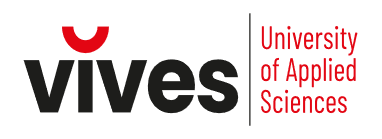<br>

**Dania International Days**<br>
13 - 15 March 2024<br><br>
Workshop by Andy Louwyck

---



---



# **INTRODUCTION TO DEEP LEARNING WITH PYTHON**

This notebook is a brief introduction to deep learning with Python. We'll make use of [Keras](https://keras.io/), a popular deep learning library, which has become the high-level API of Google's [TensorFlow](https://www.tensorflow.org/), and allows us to easily build, train, and evaluate **artificial neural networks**.

Neural networks are inspired by biological brains. They also consist of **neurons** connected to each other, and exchanging signals with each other. The neurons in biological brains amplify or attenuate those signals. In an artificial neural network, the signals are the features, which are also amplified or attenuated by the neurons, also called nodes or units. In each node the weighted sum of the input is transformed by an **activation function**. The weights used in the weighted sum are the **parameters** of the model, which is an artificial neural network in this case.

A classical neural network consists of several layers, of which the input layer receives the features of the data, and passes them on to the internal hidden layers, which transform the features, finally arriving at the output layer, which makes the predictions. This is called the **forward pass**.

During training of the neural net, the model parameters are adjusted iteratively in order to minimize the **loss function**. The loss function is a measure of the difference between predicted and true labels or targets. In this step, two algorithms are involved: the **backpropagation** algorithm which adjusts the parameters jointly, and an **optimizer** that minimizes the loss function.

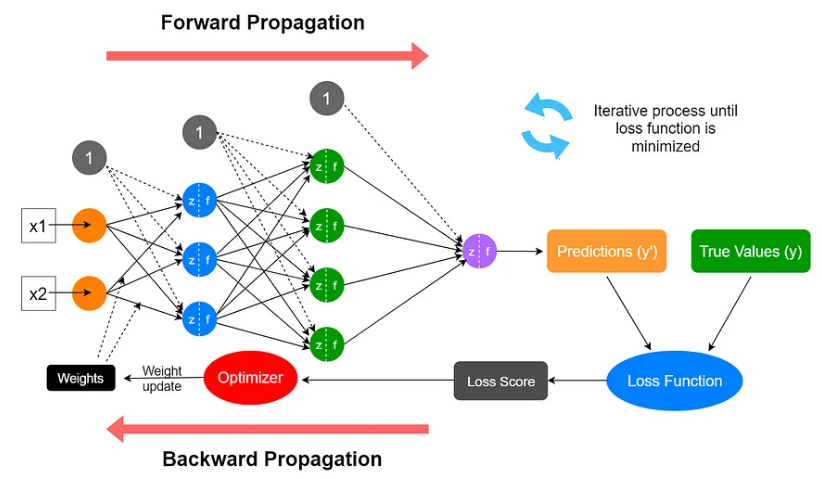

## **Python Libraries**

We need the following libraries:
- **NumPy**: library for numerical computation.
- **Pandas**: library for analyzing structured data
- **MatplotLib**: library for visualizing data
- **Pillow**: library for editing images
- **Scikit-Learn**: machine learning library
- **TensorFlow + Keras**: deep learning library

We import these libraries using the `import` command. It is customary to give NumPy alias `np` and Pandas alias `pd`. From MatplotLib, we need the `pyplot` module; the convention is to import it as `plt`.

In [1]:
from tensorflow import keras  # keras is TensorFlow's high-level API
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import PIL  # python imaging library
import matplotlib.pyplot as plt  # python library for visualizations
plt.rcParams["figure.dpi"] = 100  # set dpi of figures

From Scikit-Learn, we import the classes we use at the time we need them.

## **Tensors**

Before diving into deep learning, we need to first say something about **tensors**, because tensors play a fundamental role as the building blocks for data representation and manipulation in deep learning. Tensors are **multi-dimensional arrays** that extend the concept of scalars, vectors, and matrices to higher dimensions. They are the backbone of various deep learning frameworks, including TensorFlow and PyTorch. These data structures are very efficient for specific mathematical operations called **tensor operations**. Understanding tensors is crucial for anyone venturing into the field of deep learning, as they are at the core of data storage and computation in neural networks. Here, we explore tensors and their operations through NumPy.

### NumPy Arrays

In NumPy, tensors are represented as `ndarray` objects, which stands for n-dimensional array. We can simply create a NumPy array by passing a list to `np.array`:

In [3]:
a = np.array([1, 2, 3])
print(a)
print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


A NumPy array is characterized by the following **attributes**:
- `ndim`: integer indicating the number of dimensions or axes, also called the *rank* of the array;
- `shape`: tuple containing the number of elements in each dimension or along each axis;
- `size`: integer indicating the total number of elements;
- `dtype`: the data type of the elements.

In [4]:
print("ndim:", a.ndim)
print("shape:", a.shape)
print("size:", a.size)
print("dtype:", a.dtype)

ndim: 1
shape: (3,)
size: 3
dtype: int64


As we see, array `a` is one-dimensional and has three 64-bit integer elements. A one-dimensional array is called a **vector**. How do we create a two-dimensional array, called a **matrix**?

In [5]:
M = np.array([[1, 2, 3],   # row 1
              [4, 5, 6]],  # row 2
             dtype=float)  # dtype
print(M)

[[1. 2. 3.]
 [4. 5. 6.]]


We simply pass a list of lists to `np.array`, where each sublist represents a row in the matrix. By passing a `dtype` argument, we may define the datatype of the elements. Here, the elements would be integers by default, but by setting `dtype` to `float`, they are converted to double-precision floating point numbers:

In [6]:
print("ndim:", M.ndim)
print("shape:", M.shape)
print("size:", M.size)
print("dtype:", M.dtype)

ndim: 2
shape: (2, 3)
size: 6
dtype: float64


We see matrix `M` indeed has two dimensions or axes, and the `shape` attribute indicates how many elements each dimension has. The convention is that the number of rows is the first axis, whereas the number of columns is the second axis. So in case of a 2D matrix the shape attribute is `(nrow, ncol)`.

Can we have arrays with zero dimensions? Yes! They are called **scalars** as they contain one element only:

In [7]:
s = np.array(np.pi)
print("scalar s:", s)
print("ndim:", s.ndim)
print("shape:", s.shape)
print("size:", s.size)
print("dtype:", s.dtype)

scalar s: 3.141592653589793
ndim: 0
shape: ()
size: 1
dtype: float64


We see that `ndim` is `0` indeed, and consequently, `shape` is an empty tuple! There is, however, one element in `s`, which is indicated by `size`.

And how about multi-dimensional arrays? Well, they are created by passing nested lists to `np.array`:

In [8]:
N = np.array([
              # first matrix
              [[1, 2, 3],   # row 1
               [4, 5, 6]],  # row 2
              # second matrix
              [[7, 8, 9],   # row 1
               [0, 0, 0]]   # row 2
              ])
print(N)

[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 0 0]]]


Array `N` is three-dimensional:

In [9]:
print("ndim:", N.ndim)
print("shape:", N.shape)
print("size:", N.size)
print("dtype:", N.dtype)

ndim: 3
shape: (2, 2, 3)
size: 12
dtype: int64


If we look at the `shape` attribute, we see we have created two matrices of two rows and three columns indeed! The figure below shows how n-dimensional arrays and their axes should be visualized:

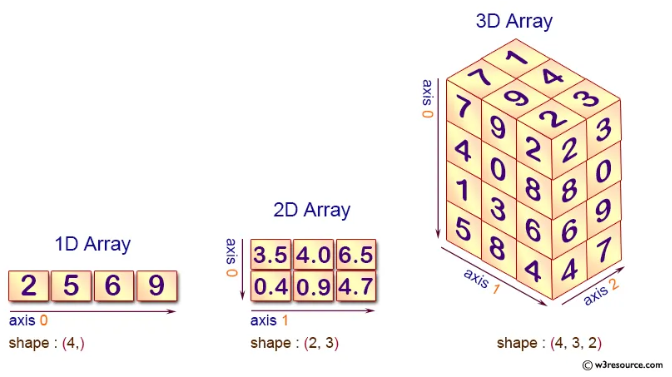

Typing all the elements and puting them into nested lists each time we want to create an array can be cumbersome. Fortunately, NumPy provides functions to create **special arrays**:

In [10]:
Z = np.zeros((2, 2, 3))     # all zeros
O = np.ones((4, 5))         # all ones
I = np.eye(3)               # identity matrix
D = np.diag([1, 3, 5])      # diagonal matrix
R = np.random.rand(3, 4)    # random matrix

for a in [Z, O, I, D, R]:
    print(a)
    print()

[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[1 0 0]
 [0 3 0]
 [0 0 5]]

[[0.49850948 0.14742476 0.31437    0.60908153]
 [0.47562169 0.31485924 0.28932051 0.73817922]
 [0.53935862 0.41640451 0.96653878 0.45308597]]



**Selecting array elements** can be done in the same way elements are retrieved from (nested) lists:

In [11]:
R[0][1]  # first row, second column

0.14742476347767397

But there is more convenient way that gives the same result:

In [12]:
R[0, 1]

0.14742476347767397

And of course, we may select more than one element or subarrays from an array:

In [13]:
R[-1, :]  # last row

array([0.53935862, 0.41640451, 0.96653878, 0.45308597])

In [14]:
R[:, 0]  # first column

array([0.49850948, 0.47562169, 0.53935862])

In [15]:
R[1:, 1:-1]  # all rows except for the first, and all columns except for the first and the last

array([[0.31485924, 0.28932051],
       [0.41640451, 0.96653878]])

### Vectorized Expressions

So far, NumPy arrays seem to have no real additional benefits as they are nothing more than nested lists. However, working with NumPy arrays is very powerful as they allow for **vectorized expressions**. These expressions make it possible to perform element-wise operations on entire arrays or matrices, eliminating the need for explicit loops. They take advantage of NumPy's optimized C-based backend to efficiently perform operations on large datasets. When you apply a function or operation to a NumPy array, it automatically applies the operation to each element of the array, resulting in a new array with the same shape. This makes it both more concise and computationally efficient compared to traditional iterative operations. Let's illustrate this with an example:

In [20]:
from time import time  # we need this to time the calculations

# a very large matrix containing one million elements equal to 1
X = np.ones((1000, 1000))

# now we want to multiply each element by 2
start = time()
for irow in range(X.shape[0]):
    for icol in range(X.shape[1]):
        X[irow, icol] *= 2
dt_loop = time() - start
print('loop:', dt_loop, 'sec')

# the vectorized expression without loop
X = np.ones((1000, 1000))
start = time()
X *= 2
dt_vect = time() - start
print('vectorized:', dt_vect, 'sec')

# compare both execution times
print(f'vectorized expressoin is {dt_loop / dt_vect:.1f} times faster!')

loop: 0.4186990261077881 sec
vectorized: 0.0008974075317382812 sec
vectorized expressoin is 466.6 times faster!


We see the vectorized expression is more than 400 times faster!

So all *elementary arithmetic operations* are vectorized in NumPy, which may be useful in the creation of special arrays:

In [21]:
n = 3
A = 10 * np.ones((n, n))      # 3x3 matrix with constant elements equal to 10
B = 2 * np.random.rand(n, n)  # 3x3 matrix with numbers between 0 and 2
C = 5 * np.eye(n)             # 3x3 diagonal matrix with nonzero element equal to 5

print(A)
print("\n+\n")
print(B)
print("\n+\n")
print(C)
print("\n=\n")
print(A + B + C)

[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]

+

[[0.3955028  0.82228288 1.37260507]
 [0.9076071  0.57545008 1.47744628]
 [0.31000309 1.31240551 0.46698996]]

+

[[5. 0. 0.]
 [0. 5. 0.]
 [0. 0. 5.]]

=

[[15.3955028  10.82228288 11.37260507]
 [10.9076071  15.57545008 11.47744628]
 [10.31000309 11.31240551 15.46698996]]


We see that it is also possible to sum arrays of the same shape. If we use the `*` operator for multiplication, then NumPy performs element-by-element multiplication:

In [22]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[10, 10, 10],
              [20, 20, 20]])
print(A)
print('\n*\n')
print(B)
print('\n=\n')
print(A * B)  # element-by-element multiplication

[[1 2 3]
 [4 5 6]]

*

[[10 10 10]
 [20 20 20]]

=

[[ 10  20  30]
 [ 80 100 120]]


As we know, there is also [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication)! In NumPy this can be performed by applying function `dot`:

In [23]:
np.dot(A, B.T)

array([[ 60, 120],
       [150, 300]])

Recall that the number of columns in `A` must be equal to the number of rows in `B`, which is why we have transposed the second matrix, or `B.T`. As the shape of matrix `A` is 2x3, and the shape of the transpose of matrix `B` is 3x2, the resulting matrix has shape 2x2. If we transpose matrix `A` instead of matrix `B`, we get a 3x3 matrix as result:

In [24]:
np.dot(A.T, B)

array([[ 90,  90,  90],
       [120, 120, 120],
       [150, 150, 150]])

*Mathematical functions* available in NumPy are also vectorized:

In [25]:
v = np.array([10, 100, 1000, 10_000, 100_000])
np.log10(v)

array([1., 2., 3., 4., 5.])

In [26]:
x = np.pi / 4 * np.arange(7)  # numpy equivalent of range
np.sin(x)

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

It may be useful in some cases to **reshape arrays** using functions or methods `flatten`, `squeeze` or `reshape`:

In [27]:
A = np.array([range(4), range(4), range(4)])  # 3x4 matrix
A.flatten()  # flatten the array to 1D vector

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [28]:
A.reshape((2, 6))  # reshape to 2x6 matrix

array([[0, 1, 2, 3, 0, 1],
       [2, 3, 0, 1, 2, 3]])

In [29]:
v = np.arange(1, 6)  # 1D vector
print(v)
print()
c = v[:, np.newaxis]  # add extra dimension
print(c)
print()
print(c.squeeze())  # squeeze c = omit singleton dimensions

[1 2 3 4 5]

[[1]
 [2]
 [3]
 [4]
 [5]]

[1 2 3 4 5]


Finally, we briefly discuss **broadcasting** in NumPy. It is a mechanism that allows arrays with different shapes to be combined or operated upon together, even if their shapes don't match exactly. NumPy automatically adjusts the dimensions of the smaller array to make the operation possible, making it more convenient and efficient for element-wise operations on arrays of different shapes. Actually, we've already encountered broadcasting when we added a number to an array or multiplied an array by a number. But broadcasting also applies to matrices:

In [30]:
A = np.array([np.zeros(3),
              10 * np.ones(3),
              20 * np.ones(3),
              30 * np.ones(3)])  # 4x3 matrix
b = np.arange(1, 4)  # 3 element vector
print(A)
print('\n+\n')
print(b)
print('\n=\n')
print(A + b)  # outcome is also 4x3

[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]

+

[1 2 3]

=

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


We see that vector `b`, which contains 3 elements, is broadcasted to a 4x3 matrix so it can be added to matrix `A`. It is as if vector `b` is 'stretched' by 'repeating' it 4 times:

In [31]:
np.tile(b, (4, 1))  # 4x 'repeating' vector b along the row axis

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

The figure below visualizes very clearly what happens:

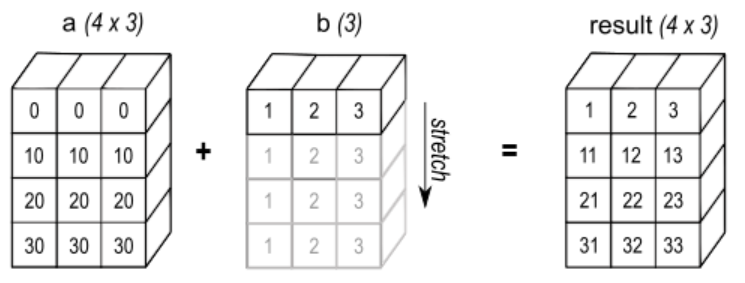

Obviously, broadcasting is only possible if the shapes of the arrays that are involved are compatible. If vector `b` has 4 elements, then the broadcasting does not work, and a `ValueError` is thrown!

In [32]:
A = np.ones((3, 2))  # 3x2 matrix
b = np.ones(4)  # 4 element vector
try:
    print(A + b)
except ValueError as error:
    print(error)

operands could not be broadcast together with shapes (3,2) (4,) 


Ok, so far this crash course in NumPy. We are ready now to dive into Keras!

## **Simple Linear Regression**

Simple linear regression is a statistical method used to model the relationship between a single independent variable and a dependent variable by fitting a linear equation to observed data. It aims to **find the best-fitting straight line** that describes the relationship between the variables, allowing for prediction and inference.

Simple linear regression can be applied easily using Scikit-Learn, which employs an algorithm that provides an *exact solution*. This is possible because simple linear regression is a linear problem that can be solved *analytically*. The specific algorithm used is known as the **Ordinary Least Squares** method (OLS), and in the case of simple linear regression, it determines the exact minimum of the **loss function**, which is the sum of squared differences between predicted and actual target values. Consequently, the optimal **parameters** derived from this algorithm are an exact solution.

In deep learning, artificial neural nets are trained using an iterative **optimizer** that minimizes the loss function *numerically* yielding an *approximate solution* which is hopefully close enough to the exact solution. Why don't we solve deep learning problems analytically to get an exact solution? Well, most of these problems are nonlinear and too complex to find the analytical exact solution, so there is no other option than to apply an iterative numerical solution method. In deep learning, this method is called **stochastic gradient descent** and the optimizers that are used to minimize the loss function and find the optimal parameters implement variants to that algorithm.

Simple linear regression may also be performed using a neural network, in which case we get the simplest neural net possible containing *one node or neuron only*! In this case, however, the derived parameters will be approximations to the exact solution, as the optimizer is numerical and iterative.

### Example

Let's illustrate this using the `'age_couple.xlsx'` dataset. First we read the data set using Pandas function `read_excel()`:

In [34]:
df = pd.read_excel('age_couple.xlsx')
df.head()

,Couple,Husband's age,Wife's age
0,1,25,22
1,2,25,32
2,3,51,50
3,4,25,25
4,5,38,33


Let's calculate some summarizing statistics and make a scatterplot to explore the data:

In [39]:
df.describe().T  # T transposes the table

,count,mean,std,min,25%,50%,75%,max
Couple,25.0,13.00,7.359801,1.0,7.0,13.0,19.0,25.0
Husband's age,25.0,37.68,17.331859,19.0,25.0,31.0,51.0,85.0
Wife's age,25.0,35.92,16.884214,16.0,24.0,30.0,44.0,86.0


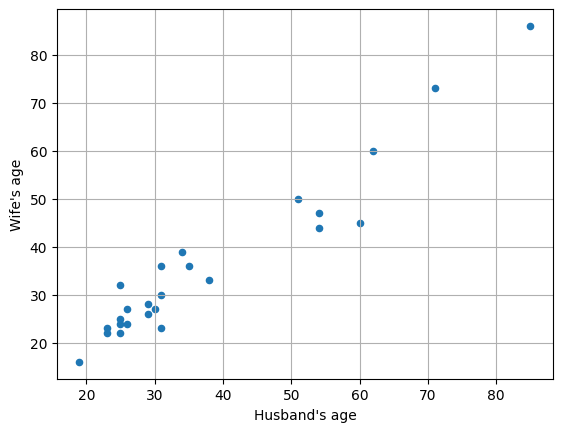

In [41]:
df.plot.scatter(x="Husband's age", y="Wife's age");
plt.grid();

The assumption of a linear relationship between the husband's and wife's age is reasonable here, so we try to predict the wife's age given the husband's age by applying simple linear regression. That implies the first is the independent variable or feature `X`, while the latter is the dependent variable or target `y`:

In [35]:
X = df[[df.columns[1]]]   # husband's age
y = df[[df.columns[-1]]]  # wife's age

Both `X` and `y` are still Pandas DataFrames with one column only. It is also possible to convert them to NumPy arrays using the `values` attribute of the dataframes. Anyway, both variables should hold a 2D matrix.

Applying simple linear regression using Scikit-Learn is very straightforward, giving an exact solution for parameters `m` and `b`, which are the slope and the intercept of the best-fitting straight line, respectively:

In [36]:
from sklearn.linear_model import LinearRegression

exact = LinearRegression()
exact.fit(X, y)
m, b = exact.coef_[0][0], exact.intercept_[0]
m, b

(0.9370159124703167, 0.6132404181184725)

To evaluate the model, we calculate the mean squared error (MSE), the mean absolute error (MAE), and the coefficient of determination R²:

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

yp = exact.predict(X)
print("MSE is", mean_squared_error(y_true=y, y_pred=yp))
print("MAE is", mean_absolute_error(y_true=y, y_pred=yp))
print("R² is", r2_score(y_true=y, y_pred=yp))

MSE is 20.47840742138087
MAE is 3.382677822410618
R² is 0.9251721487882614


An R² score of 0.92 indicates a very good fit, and the MAE tells us that the mean absolute difference between the real and the predicted age of the wife is about 3.4 years.

Now let's solve this simple linear regression problem using Keras! The easiest way to build a neural network that consists of one neuron only, is using the Keras class `Sequential` and add a `Dense` layer to it that contains one unit:

In [42]:
model = keras.Sequential()  # instantiate Sequential
model.add(keras.layers.Dense(units=1))  # add 1 layer with 1 unit or node

Before training this model, we need to `compile` it so Keras knowns which `loss` function it has to minimize and which `optimizer` it must use. Here we will minimize the Mean Squared Error (MSE) and we will apply the classical Stochastic Gradient Descent (SGD):

In [43]:
model.compile(loss="mse",       # MSE
              optimizer="sgd")  # SGD

We are ready now to train the model by calling method `fit`. Just like with Scikit-Learn, we need to pass features `X` and target `y`. Additionally, the number of iterations must be passed as the solution method is iterative. Here, these iterations are called `epochs`, where one **epoch** refers to a single complete pass through the entire training dataset during the training process:

In [44]:
result = model.fit(X, y,
                   epochs=15);

Epoch 1/15
1/1 [==============================] - 0s 445ms/step - loss: 65.1476
Epoch 2/15
1/1 [==============================] - 0s 10ms/step - loss: 49127.7500
Epoch 3/15
1/1 [==============================] - 0s 11ms/step - loss: 54062176.0000
Epoch 4/15
1/1 [==============================] - 0s 12ms/step - loss: 59517079552.0000
Epoch 5/15
1/1 [==============================] - 0s 10ms/step - loss: 65522393677824.0000
Epoch 6/15
1/1 [==============================] - 0s 10ms/step - loss: 72133675088609280.0000
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 79412007413796044800.0000
Epoch 8/15
1/1 [==============================] - 0s 9ms/step - loss: 87424704628847504523264.0000
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 96245924098067732975583232.0000
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 105957238488687782206875107328.0000
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 116

That doesn't seem to work well! Instead of minimizing the loss function, the optimizer is causing the loss to increase significantly, eventually reaching an infinitely large value. Fortunately, this is a well-known problem called the *exploding gradient problem*, and one way to address it is by **scaling the features**. We can do that here by simply dividing the ages by 100, which is a reasonable estimate of the maximum age:

In [45]:
Xn = X / 100
yn = y / 100

It's worth noting that the *vanishing gradient problem* is another issue that can occur, causing the model not to train effectively.

Let's re-build our simple linear regression model and re-train it using the scaled features. We also apply a more effective optimizer, RMSprop, which is the default optimizer in Keras and a more efficient variant of SGD:

In [46]:
model = keras.Sequential()
model.add(keras.layers.Dense(1))
model.compile(optimizer="rmsprop", loss="mse")
result = model.fit(Xn, yn,
                   epochs=5000,  # we need a lot of epochs to reach the minimum
                   verbose=0);   # suppress output

Let's plot the loss function versus the number of epochs:

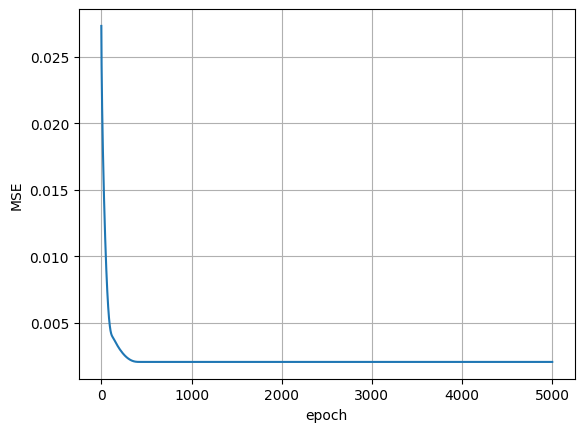

In [47]:
plt.plot(result.history['loss']);
plt.grid();
plt.xlabel('epoch');
plt.ylabel('MSE');

We see the loss function reaches a minimum after about 200 epochs of training. Let's check the parameters, which are called `weights` here:

In [48]:
m2, b2 = tuple(model.layers[0].weights)
m2 = m2.numpy().squeeze().item()
b2 = b2.numpy().squeeze().item()
m2, b2

(0.9374411106109619, 0.006618058308959007)

Why do we get different values here? Well, because we have normalized the features. To compare the results, we may calculate the MSE, the MAE, and the R² score, for which we need to `predict` the target:

In [49]:
yp = model.predict(Xn) * 100  # multiply by 100 to undo the scaling!

1/1 [==============================] - 0s 81ms/step


We get scores that are very close to the scores calculated previously for the Scikit-Learn model:

In [50]:
print("MSE is", mean_squared_error(y_true=y, y_pred=yp))
print("MAE is", mean_absolute_error(y_true=y, y_pred=yp))
print("R² is", r2_score(y_true=y, y_pred=yp))

MSE is 20.482632712936464
MAE is 3.378796157836914
R² is 0.9251567096243976


Let's plot the result:

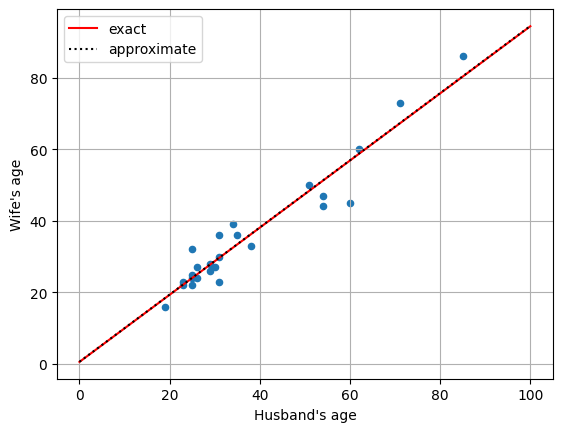

In [51]:
# scatter plot
df.plot.scatter(x=df.columns[1], y=df.columns[-1]);
plt.grid();

# exact regression line
xline = np.array([0, 100])
yline = m * xline + b  # y = mx + b
plt.plot(xline, yline, 'r-', label='exact');

# approximate regression line
xline = np.array([0, 1])
yline = m2 * xline + b2
plt.plot(xline * 100, yline * 100, 'k:', label='approximate');  # don't forget to scale back!
plt.legend();

Note that it is also possible here to "predict" the regression line instead of using the weights to draw this line:

```python
yline = model.predict(xline)
```

We see that the exact solution returned by the Scikit-Learn code and the approximate solution given by the Keras model are virtually the same!

## **Logistic Regression**

Just like linear regression, it is also possible to build a neural network that performs logistic regression. Again, a very simple neural net consisting of one neuron only can do the job. In this case, however, an additional transformation is required to convert the weighted sum of the input features into a probability between 0 and 1. This is achieved by applying an **activation function**, which is the **sigmoid** function in this case:

> $y = \sigma(x)= \dfrac{1}{1+e^{-x}}$

Using NumPy and MatplotLib, it is easy to implement this function and plot it:

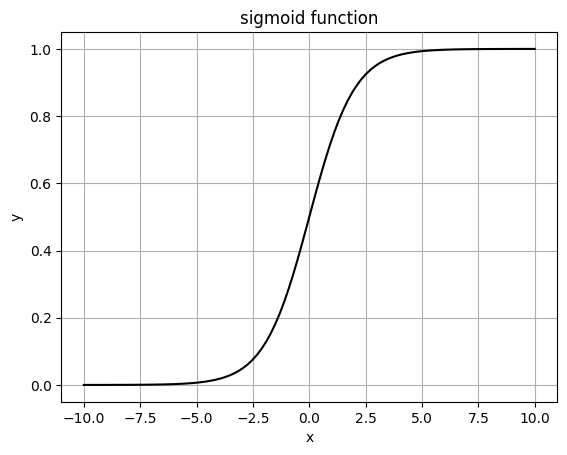

In [ ]:
x = np.linspace(-10, 10, 100)  # create array of 100 evenly spaced points between -10 and 10
sigmoid = lambda x: 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x), 'k-');
plt.grid();
plt.title('sigmoid function');
plt.xlabel('x');
plt.ylabel('y');

We see argument $x$ is transformed indeed into a number $y$ between 0 and 1. If $x = 0$, then the sigmoid function returns 0.5, which corresponds to a probability of 50%. Positive values are mapped to a number greater than 0.5, while negative values to a number less than 0.5. Mathematically, the function returns 1 if $x$ is $\infty$, and it returns 0 if $x$ is $-\infty$. From the graph, it is clear that $x$ values greater than 5 are mapped to a value very close to 1, and values smaller than -5 to a value very close to 0:

In [ ]:
sigmoid(np.array([-5, 5]))

array([0.00669285, 0.99330715])

What about the optimization algorithm? For logistic regression, Scikit-Learn also uses an iterative optimizer by default, but as is the case for linear regression, it is a much more efficient method for solving this particular kind of linear and binary classification problems. Let's find out!

### Example

Consider the dataset `'Student_Passed.csv'` containing the number of courses students follow, the time they've studied, and whether they passed or not. Let's read the dataset and explore it by making a scatterplot and calculating some summarizing statistics:

In [33]:
df = pd.read_csv('Student_Passed.csv')
df.head()

,number_courses,time_study,passed
0,3,4.508,1
1,4,0.096,0
2,4,3.133,1
3,6,7.909,1
4,8,7.811,1


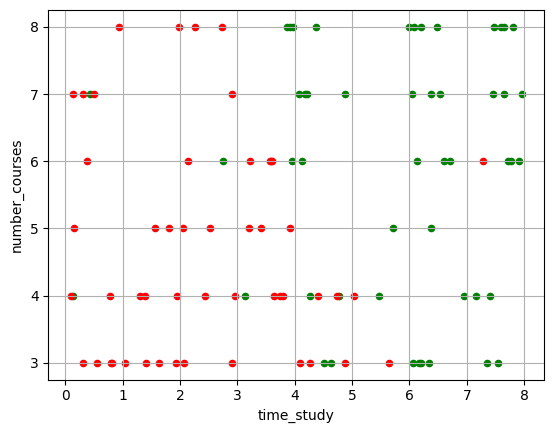

In [36]:
def students_scatterplot(df):
    _, ax = plt.subplots(1, 1)
    df[df.passed==1].plot.scatter(x="time_study", y="number_courses", color="green", ax=ax);
    df[df.passed==0].plot.scatter(x="time_study", y="number_courses", color="red", ax=ax);
    plt.grid();
    return ax

students_scatterplot(df);

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_courses,100.0,5.29000,1.799523,3.000,4.0000,5.000,7.00000,8.000
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.022,6.17925,7.957
passed,100.0,0.50000,0.502519,0.000,0.0000,0.500,1.00000,1.000


It seems the dataset is perfectly balanced because the mean of variable 'passed' is 0.5. Let's check this:

In [35]:
df.passed.sum()

50

The dataset is balanced indeed as 50 out of 100 students passed!

We assign the features to NumPy array `X` and the labels to NumPy vector `y`:

In [39]:
X = df[['time_study', 'number_courses']].values  # features
y = df['passed'].values  # labels

Let's apply logistic regression by using Scikit-Learn class `LogisticRegression`:

In [40]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty=None)
reg.fit(X, y)
reg.score(X, y)

0.89

The model's **accuracy** is 89%. Because we only have two features, it is possible to visualize the separating line (blue) the logistic regression model derived:

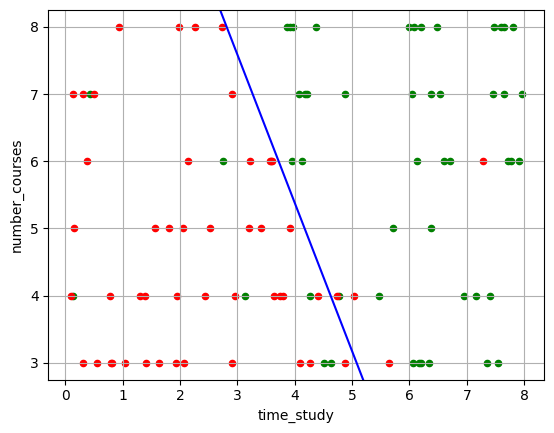

In [51]:
students_scatterplot(df)
xline = np.array([0, 8])
yline = -(reg.intercept_.item() + reg.coef_[0][0] * xline) / reg.coef_[0][1]
xl, yl = plt.xlim(), plt.ylim()
plt.plot(xline, yline, 'b-');
plt.xlim(xl);
plt.ylim(yl);

Now let's build and train a similar neural network for logistic regression. First we need to scale matrix `X`, and reshape `y` to a 2D matrix. The maximum number of courses is 8, and the maximum number of study time is almost 8, so we may simply divide `X` by 8:

In [41]:
Xn = X / 8             # divide all features by the maximum value of 8
yn = y.reshape(-1, 1)  # reshape 1D vector y so it becomes a 2D column vector

Building the neural net with one unit only and `'sigmoid'` as `activation` function:

In [42]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1,  # one node only
                             activation='sigmoid'))  # sigmoid as activation function

Compiling the model. This time, the `loss` function is binary cross entropy or log loss, which is a very efficient loss function for binary classification problems. But as it is difficult to interpret this loss function, we also define `'accuracy'` as metric:

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Training the model. As you see, we need a lot of epochs here. Therefore, we group the data points into **batches**, which are created randomly during training. The `batch_size` determines the number of samples in each batch. By default, the optimizer processes one sample at a time.

In [44]:
result = model.fit(Xn, yn,
                   epochs=1000,
                   batch_size=64,
                   verbose=0)  # no output

Let's plot the loss and the accuracy during training:

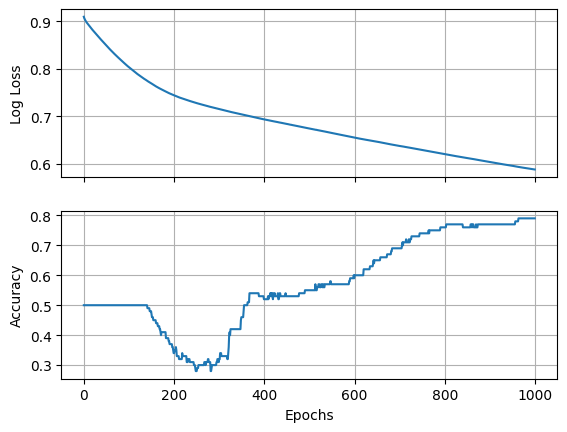

In [45]:
def plot_loss_accuracy(result):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(result.history['loss']);
    ax1.grid();
    ax1.set_ylabel('Log Loss');
    ax2.plot(result.history['accuracy']);
    ax2.grid();
    ax2.set_ylabel('Accuracy');
    ax2.set_xlabel('Epochs');
    return ax1, ax2

plot_loss_accuracy(result);

By calling method `evaluate`, we get the final loss and accuracy:

In [46]:
loss, acc = tuple(model.evaluate(Xn, yn))
print('Log Loss:', loss)
print('Accuracy:', acc)

4/4 [==============================] - 0s 5ms/step - loss: 0.5878 - accuracy: 0.7900
Log Loss: 0.5878112316131592
Accuracy: 0.7900000214576721


We can see that the loss function is still decreasing, but after 1000 epochs, we have only achieved an accuracy of 79%, while with the Scikit-Learn model, we achieve an accuracy that is 10% higher! So the model is converging to a solution, but it goes very slowly! Is it possible to speed up the training? Yes, it is! How? By defining a larger **learning rate**. This *hyperparameter* determines the size of the steps the optimizer takes, and by increasing it, the optimizer will take larger steps. Let's try this out!

In [47]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
optimizer = keras.optimizers.RMSprop(learning_rate=0.1)  # by default, the learning rate is 0.001
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
result = model.fit(Xn, yn, epochs=1000, batch_size=64, verbose=0)

Plotting loss and accuracy during training:

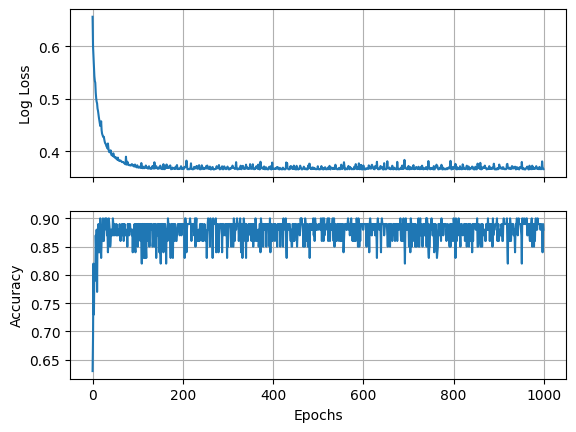

In [48]:
plot_loss_accuracy(result);

Evaluating this new model:

In [49]:
loss, acc = tuple(model.evaluate(Xn, yn))
print('Log Loss:', loss)
print('Accuracy:', acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.3656 - accuracy: 0.8900
Log Loss: 0.3655741810798645
Accuracy: 0.8899999856948853


We obtain 89% now, which is also the accuracy of the Scikit-Learn model. However, the graph clearly shows that model *convergence* is less smooth as the loss function shows a lot of fluctuations. That is because the optimizer takes much larger steps now, and in some cases, it is even necessary to reduce the learning rate when these fluctuations prevent convergence.

Another solution could be to add an extra layer to the model, but it's clear which method is the most efficient! So, let's take a look at some examples where neural networks do perform very well...

## **Predicting House Prices**

A classical example of a regression problem that can be solved using a neural net is predicting house prices. This is a **regression task**, as the target is *quantitative*. The aim is to build a model that can provide accurate price estimates based on the available features.

### The Boston Housing dataset

The dataset we're working with involves house prices in Boston, USA from the 1970s. It includes various features such as the number of rooms, crime rates, and taxes, among others. However, there is a limited amount of data available for this analysis. We have 404 training samples and 102 test samples, which may constrain the model's ability to generalize well. Additionally, the features in this dataset are on different scales, which can impact the performance of certain machine learning algorithms. To mitigate this, we'll rescale the features to ensure that they are comparable.

It's worth noting that the dataset was once part of Scikit-Learn but has since been removed due to ethical concerns regarding the data's origin and potential biases. For more information on the removal of this dataset, you can refer to the following sources:

- [Scikit-Learn Documentation](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html)
- [Medium Article on Ethical Concerns](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8)

Despite the removal of the dataset, the analysis and methodology for working with similar datasets remain valuable for understanding and solving regression problems, ensuring fairness and ethical considerations in data science.

The dataset is still available with Keras:

In [ ]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


The dataset is divided into a training set and a test set. We will train the model on the training set only, and afterwards evaluate it using the test set. For both sets, data and corresponding labels are returned. As regression is a kind of *supervised learning*, we also need the labels.

Checking the number of samples and features:

In [ ]:
print(train_data.shape)  # 404 samples, 13 features
print(test_data.shape)  # 102 samples, 13 features

(404, 13)
(102, 13)


The target is the median house price expressed in 1000 dollars. Recall that these are data from the 1970s when house prices were much cheaper. To get an idea of the values, let's plot a histogram of the targets in both training and test set:

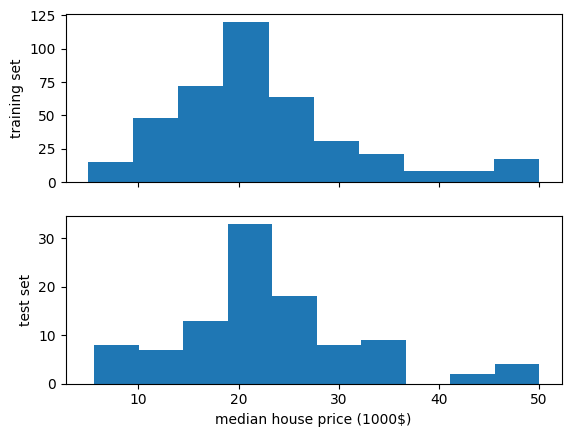

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.hist(train_labels);
ax1.set_ylabel('training set');
ax2.hist(test_labels);
ax2.set_xlabel('median house price (1000$)');
ax2.set_ylabel('test set');

At first sight, the training and test set targets are indeed sampled from the same distribution. In practice, a more profound [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) is performed before training the model, but as this topic is outside the scope of the workshop, we'll skip this step and jump right into the next step: the training phase.

However, we still have to do one important thing and that is scaling the features. Here, we will apply **standardization**, a.k.a. z-score normalization:

> $Z_i = \dfrac{X_i - \mu}{\sigma}$

where $\mu$ and $\sigma$ are the mean and the standard deviation, respectively, of feature $X$ considering all samples $i$ in the training set. Using NumPy normalizing the features is very straightforward:

In [ ]:
mean = train_data.mean(axis=0)  # mean
std = train_data.std(axis=0)  # standard deviation
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

The `axis=0` parameter tells the NumPy methods `mean` and `std` to calculate the mean and the standard deviation of the columns.

Also note that the test data are normalized using the mean and standard deviation of the training set! **Keep in mind that the test data can never be used to preprocess the training data!** It's crucial indeed to ensure that information from the test set doesn't "leak" into the machine learning model during training.

### The regression model

We are ready now to build and train the model. Here, we are dealing with scalar regression, as the primary objective is to predict a single continuous value, often referred to as a scalar. Several key characteristics define this type of regression:

1. **Output Layer:** In scalar regression, the output layer of the neural network typically does *not have an activation function* applied to it. This means that the output is a linear combination of the inputs, allowing the model to predict continuous values without any distortion from an activation function.

2. **Loss Function:** To measure the performance of the model and guide its training, the *Mean Squared Error* (MSE) is commonly employed as the loss function. Recall that MSE quantifies the average squared difference between the predicted values and the actual target values.

3. **Evaluation Metric:** When assessing the model's performance, the *Mean Absolute Error* (MAE) is a frequently used evaluation metric in scalar regression tasks. MAE calculates the average absolute difference between the model's predictions and the true values, providing a clear measure, expressed in the same unit as the predicted targets.

The model itself consists of 3 layers:
- the first layer has 32 units and ReLU as activation function;
- the second layer also has 32 units and ReLU as activation function;
- as already explained the output layer has 1 unit as there is only one target to predict and it has no activation function.

The **ReLU** function stands for Rectified Linear Unit, and its definition is as follows:

> $y =
\begin{cases}
    x,& \text{if } x\geq 0\\
    0,              & \text{otherwise}
\end{cases}$

So it doesn't transform positive values and it maps negative values to zero. In terms of computational cost, it is not expensive, and it has proven to accelarate training and to overcome the vanishing gradient problem.

Let's plot this function:

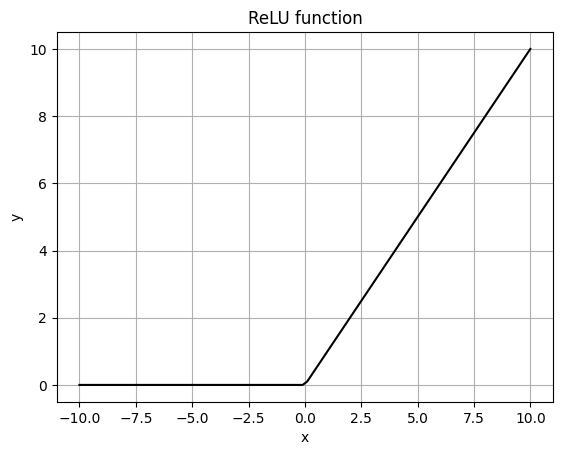

In [ ]:
relu = lambda x: np.maximum(x, 0)

x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x), 'k-');
plt.title('ReLU function');
plt.xlabel('x');
plt.ylabel('y');
plt.grid();

To build the model, we make use again of Keras class `Sequential`, but instead of using method `add`, we now pass a list of layers to its constructor:

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # regression so no activation in output layer
])

We compile the model and define RMSprop as optimizer, MSE as loss function, and MAE as evaluation metric:

In [ ]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

We train the model using the available training data.

To monitor the model's performance and detect the point where **overfitting** might occur, we set aside 10% of the training data for **validation**. We do this by setting the parameter `validation_split` to 0.1. It's important to note that the dataset we are working with is relatively small. Applying *K-fold cross-validation* would be more suitable in this case, but as this method is outside the scope of this workshop, we stick with *simple hold-out validation*.

To allow the model to converge and observe potential signs of overfitting, we train it for a total of 500 **epochs**. The choice of **batch size** can also influence the training process and computational efficiency. Here we set `batch_size` to 16.

In [ ]:
result = model.fit(
    train_data, train_labels,
    epochs=500,
    batch_size=16,
    validation_split=0.1,  # keep 10% of training data for validation
    verbose=0
  )

Let's create a plot for both the training and validation loss. We'll apply the `semilogy` function, which plots the y-values, in this case the MSE, on a logarithmic scale. This graph provides a clearer visualization of small values:

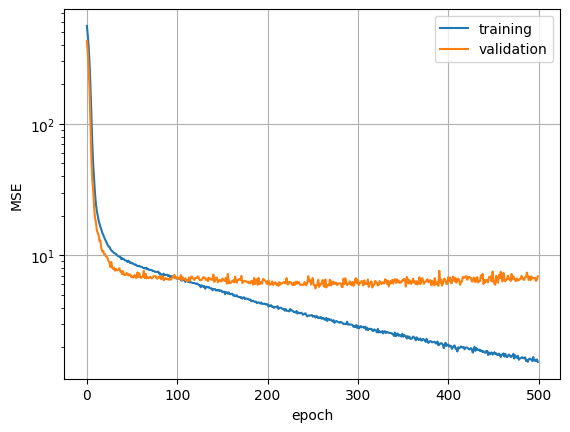

In [ ]:
plt.semilogy(result.history['loss'], label='training');
plt.semilogy(result.history['val_loss'], label='validation');
plt.legend();
plt.grid();
plt.xlabel('epoch');
plt.ylabel('MSE');

There is no substantial improvement in the validation loss beyond approximately epoch 300, while the training loss is still decreasing. This may be regarded as the point where **overfitting** occurs, so we will retrain the model for 300 epochs. During this retraining, we don't need to validate the model's performance:

In [ ]:
# build
model = keras.Sequential([
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # regression so no activation in output layer
])

# compile
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# train
result = model.fit(
    train_data, train_labels,
    epochs=300,
    batch_size=16,
    verbose=0
  )

Let's perform a final model evaluation on both the training and the test set:

In [ ]:
mse, mae = tuple(model.evaluate(train_data, train_labels, verbose=0))
print('TRAINING SET')
print("  MSE =", mse)
print("  MAE =", mae)

mse, mae = tuple(model.evaluate(test_data, test_labels, verbose=0))
print('TEST SET')
print("  MSE =", mse)
print("  MAE =", mae)

TRAINING SET
  MSE = 2.9754254817962646
  MAE = 1.2093532085418701
TEST SET
  MSE = 11.478910446166992
  MAE = 2.401169538497925


The model clearly performs less on the test set, but as already indicated, the limited number of data makes it very challenging to train a model that doesn't suffer from overfitting!

Suppose we also want to calculate the R² score, then we first need to `predict` the targets:

In [ ]:
from sklearn.metrics import r2_score

yp_train = model.predict(train_data, verbose=0)
print('Training R² is', r2_score(y_true=train_labels, y_pred=yp_train))

yp_test = model.predict(test_data, verbose=0)
print('Test R² is', r2_score(y_true=test_labels, y_pred=yp_test))

Training R² is 0.9648387353690719
Test R² is 0.8621049860709786


Here we also see a significant difference between training and test scores.

## **Text Classification**

Text classification plays a crucial role in various machine learning applications, one of which is **sentiment analysis**. It is a form of classification, where the goal is to determine the sentiment or emotional tone within a given piece of text. In this particular example, we are delving into a common use case: discerning whether a movie review expresses a positive or negative sentiment. As there are two classes, we are dealing here with **binary classification**.

This task falls under the umbrella of **Natural Language Processing** (NLP), a subfield of artificial intelligence that focuses on enabling machines to understand, interpret, and generate human language. NLP techniques are instrumental in tasks like sentiment analysis, enabling us to unlock valuable insights from the vast ocean of text data available on the web. Other NLP tasks are content filtering, translating text from one language into another, summarizing texts, converting speech to text, etc.

### Vectorization

As we are dealing with text data and neural nets are only capable of processing numerical data, we need to convert these text data into numerical data, a process that is called **vectorization**. The following steps are distinguished:
1. *standardization*: converting to lower case, removing punctuations, replacing special characters, etc.;
2. *tokenization*: splitting text into words or group of words;
3. *indexing*: converting words to integers;
4. *encoding*: transforming the integer vectors to input tensors for the neural net.

Let's illustrate this preprocessing step using a very simple example dataset consisting of two text documents only:

In [ ]:
docs = ['The cat sat on the mat.',
        'When the cat is away, the mice will play!']
docs

['The cat sat on the mat.', 'When the cat is away, the mice will play!']

In the first step the two documents are standardized by converting the strings to lower case and by removing the punctuations. For the latter, we use a *regular expression*:

In [ ]:
import re  # module for regular expressions

docs = [doc.lower() for doc in docs]  # lower case
docs = [re.sub(r'[^\w\s]', '', doc) for doc in docs]  # remove punctuations
docs

['the cat sat on the mat', 'when the cat is away the mice will play']

In the second step, the strings are tokenized by splitting them into words:

In [ ]:
docs = [doc.split(" ") for doc in docs]
docs

[['the', 'cat', 'sat', 'on', 'the', 'mat'],
 ['when', 'the', 'cat', 'is', 'away', 'the', 'mice', 'will', 'play']]

To convert the words to indices, we first need the *vocabulary*, that is the set of unique words in the dataset. Each word in this set gets a unique index. For convenience, we define this vocabulary as a dictionary `{word=index}`:

In [ ]:
unique_words = set([word for doc in docs for word in doc])
vocabulary = {word: id for id, word in enumerate(unique_words)}
vocabulary

{'sat': 0,
 'will': 1,
 'when': 2,
 'the': 3,
 'mice': 4,
 'play': 5,
 'on': 6,
 'away': 7,
 'mat': 8,
 'is': 9,
 'cat': 10}

Once we have the vocabulary, it is easy to convert the tokenized documents to integer vectors:

In [ ]:
samples = [[vocabulary[word] for word in doc] for doc in docs]
samples

[[3, 10, 0, 6, 3, 8], [2, 3, 10, 9, 7, 3, 4, 1, 5]]

In the finale step, feature matrix `X` is created by applying **multi-hot encoding**. The features are the words in the vocabulary, so each column of `X` represents a word, while each row of `X` corresponds to a sample. If the word occurs in the sample, then the corresponding entry of `X` is `1`, otherwise it is `0`:

In [ ]:
X = np.zeros((len(samples), len(vocabulary)), dtype=int)
for i, sample in enumerate(samples):
    X[i, sample] = 1
X

array([[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]])

To get a better idea how matrix `X` is constructed, we convert it to a Pandas DataFrame:

In [ ]:
pd.DataFrame(columns=vocabulary.keys(), data=X)

,sat,will,when,the,mice,play,on,away,mat,is,cat
0,1,0,0,1,0,0,1,0,1,0,1
1,0,1,1,1,1,1,0,1,0,1,1


Matrix `X` is a binary vector in this case indicating whether or not a word occurs in a document. It is also possible to count the number of times a word occurs in a sample.

### The IMDB dataset

In this example, we'll use the IMDB dataset, sourced from the popular [movie database](https://www.imdb.com/). It comprises a collection of 50,000 movie reviews, and it is perfectly balanced, with 50% of the reviews expressing positive sentiment and the other 50% conveying negative sentiment. The dataset is divided into 25,000 training samples and 25,000 testing samples. It can be downloaded from the Keras datasets. Here, we restrict the dataset to the 10,000 most frequent words:

In [ ]:
from keras.datasets import imdb

num_words = 10_000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


As usual, the dataset is divided into a training set and a test set, and there are data and corresponding labels. As classification is a kind of *supervised learning*, we need both.

The labels are easy to understand:
- `1` stands for a positive review;
- `0` for a negative review.

In [ ]:
train_labels[0]  # label of the first review

1

 Each sample in the dataset corresponds to a review.The words have already been converted into integers during the **vectorization** preprocessing step:

In [ ]:
train_data[0][:10]  # the first 10 words from the first review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

Recall that the *vocabulary* was limited to the 10,000 most frequent words. This can be easily verified by checking the maximum integer index of the samples:

In [ ]:
print(max([max(review) for review in train_data]))
print(max([max(review) for review in test_data]))

9999
9999


As we start counting from 0, the maximum index should be 9999 indeed! But what words correspond to these indices? The dataset object has a method `get_word_index` which returns a dictionary that maps each word in the dataset to its index. Let's get the first 50 words of the first sample in the training set:

In [ ]:
word_index = imdb.get_word_index()  # dict {word=index}
reverse_word_index = {index: value for value, index in word_index.items()} # we want dict {index=word}
" ".join([reverse_word_index[i] for i in train_data[0][:50]])  # first 50 words of first sample

1641221/1641221 [==============================] - 0s 0us/step


'the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several'

We see the words don't make sense as the original sentences are not preserved! It is important to understand that the model we'll build and train doesn't take into account the **word order**! There are other neural network architectures, like *Long Short-Term Memory* (LSTM) models or the widely used and popular *Transformers*, that can better preserve and utilize word order.

So the text data have already been converted to integer vectors, but the problem here is that not all vectors have the same length. Unfortunately, this is required for neural network inputs. We may apply *padding* by appending zeros to the vectors, but here, we will apply **multi-hot encoding**:

In [ ]:
def multi_hot(data):
    x = np.zeros((len(data), num_words))
    for i, review in enumerate(data):
        x[i, review] = 1.
    return x

x_train = multi_hot(train_data)
x_test = multi_hot(test_data)

Finally, we convert the labels to single-precision floating point numbers:

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### The classification model

We build and train a similar model as in previous section on predicting house prices. However, as we are dealing with binary classification here, there are some important differences:

1. **Output Layer:** In binary classification, the output layer of the neural network typically applies *sigmoid* as an activation function, just like logistic regression does. This means that the output of the model is the probability that a sample is positive.

2. **Loss Function:** It is possible to use Mean Squared Error (MSE) as loss function, but a better choice is the *Binary Cross Entropy* or Log Loss, just like in logistic regression.

3. **Evaluation Metric:** *Accuracy* is a typical metric used for evaluating the performance of a classification model as it is easy to interpret. Additionally, a *confusion matrix* may be created and precision and recall may be derived from it.

The model itself consists of 3 layers:
- the first layer has 16 units and ReLU as activation function;
- the second layer has 16 units and also ReLU as activation function;
- as already explained the output layer has 1 unit and sigmoid as activation function.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In the compiling step we define the Binary Cross Entropy as loss function and RMSprop as optimizer to minimize it, while accuracy is defined as evaluation metric:

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

As in previous example, we'll apply **simple hold-out validation** to monitor the model's performance and detect the point where overfitting might occur. We'll use the last 10,000 samples of the training set for validating the model:

In [ ]:
n = 10_000
x_val = x_train[:n]
partial_x_train = x_train[n:]
y_val = y_train[:n]
partial_y_train = y_train[n:]

We're ready now to train the model! We define 15 epochs and a batch size of 512:

In [ ]:
result = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=15,
    batch_size=512,
    validation_data=(x_val, y_val)  # validation set
)

Epoch 1/15
30/30 [==============================] - 3s 72ms/step - loss: 0.5370 - accuracy: 0.7826 - val_loss: 0.4135 - val_accuracy: 0.8617
Epoch 2/15
30/30 [==============================] - 1s 37ms/step - loss: 0.3357 - accuracy: 0.8953 - val_loss: 0.3196 - val_accuracy: 0.8855
Epoch 3/15
30/30 [==============================] - 2s 81ms/step - loss: 0.2500 - accuracy: 0.9180 - val_loss: 0.3095 - val_accuracy: 0.8758
Epoch 4/15
30/30 [==============================] - 5s 177ms/step - loss: 0.2011 - accuracy: 0.9343 - val_loss: 0.2872 - val_accuracy: 0.8844
Epoch 5/15
30/30 [==============================] - 2s 52ms/step - loss: 0.1730 - accuracy: 0.9406 - val_loss: 0.2769 - val_accuracy: 0.8867
Epoch 6/15
30/30 [==============================] - 1s 42ms/step - loss: 0.1447 - accuracy: 0.9530 - val_loss: 0.2923 - val_accuracy: 0.8829
Epoch 7/15
30/30 [==============================] - 1s 39ms/step - loss: 0.1264 - accuracy: 0.9590 - val_loss: 0.3092 - val_accuracy: 0.8816
Epoch 8/15
3

Let's plot training and validation loss and accuracy:

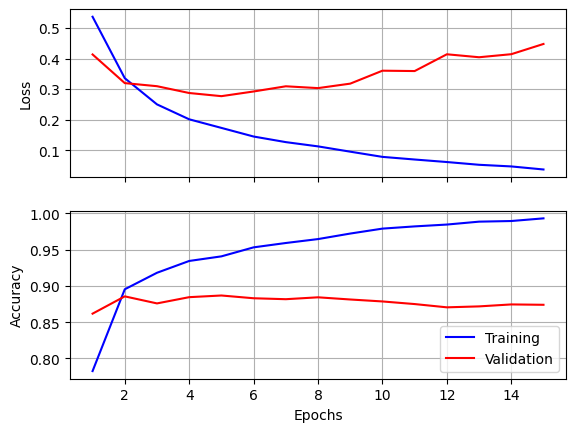

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

epochs = range(1, len(result.history['loss']) + 1)
ax1.plot(epochs, result.history['loss'], "b-", label="Training");
ax1.plot(epochs, result.history['val_loss'], "r-", label="Validation");
ax1.set_ylabel('Loss');
ax1.grid();
#ax1.legend();

ax2.plot(epochs, result.history['accuracy'], "b-", label="Training");
ax2.plot(epochs, result.history['val_accuracy'], "r-", label="Validation");
ax2.set_xlabel('Epochs');
ax2.set_ylabel('Accuracy');
ax2.grid();
ax2.legend();

Looking at the loss graph, it is clear **overfitting** occurs already after 4 epochs! Therefore, we retrain the model for 4 epochs using the entire training set:

In [ ]:
# build
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

# compile
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# fit
result = model.fit(
    x_train,   # full training set!
    y_train,
    epochs=4,  # 4 ipv 20!!
    batch_size=512,
)

Epoch 1/4
49/49 [==============================] - 3s 37ms/step - loss: 0.4650 - accuracy: 0.8075
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2719 - accuracy: 0.9016
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2118 - accuracy: 0.9242
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1799 - accuracy: 0.9356


We `evaluate` this final model using the test set:

In [ ]:
loss, acc = tuple(model.evaluate(x_test, y_test))
print('Log Loss:', loss)
print('Accuracy:', acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.2877 - accuracy: 0.8853
Log Loss: 0.2876880168914795
Accuracy: 0.8852800130844116


We get an accuracy of 88%, which could be better. However, to obtain an accuracy of 95% or more, we would have to apply a state-of-the-art neural network...

If we want to plot a confusion matrix for the test data, then we first have to `predict` the labels:

In [ ]:
prob = model.predict(x_test, verbose=0)
prob

array([[0.16733134],
       [0.9999493 ],
       [0.93520945],
       ...,
       [0.11913141],
       [0.09831439],
       [0.59893286]], dtype=float32)

Unlike Scikit-Learn, the `predict` method returns the calculated probabilities instead of the predicted labels. So we need to apply the `round` function to convert these probabilities to predictions:

In [ ]:
yp = np.round(prob)
yp

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

Now it is easy to plot the confusion matrix using static method `from_predictions`:

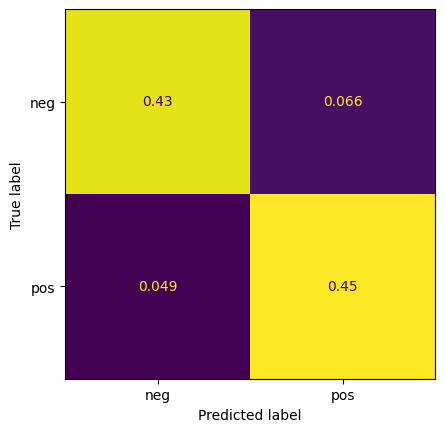

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=yp,
                                        normalize='all',
                                        display_labels=('neg', 'pos'),  # labels for 0 and 1
                                        colorbar=False);  # no colorbar

Because we have a lot of data, we have normalized the numbers so that the corresponding percentages are displayed.

## **Image Classification**

Neural networks are also very successful in **computer vision**. In particular, **convolutional networks** (CNNs or convnets) have proven to be very efficient in recognizing patterns in images. In this notebook, we will demonstrate this with a classic example of **image classification**: classifying the handwritten digits from the MNIST dataset.

First we will train a network with traditional dense layers on the dataset, after which we will try to improve the performance by using a network with convolutional layers. The neurons in such a layer do not calculate a weighted sum, but apply a mathematical operation called convolution. The same operation is also used, for example, to make photos blurrier or sharper. Think about applying filters in Instagram. Simply put, a convnet derives by itself the best filters from the given images, which allows for "recognizing" lines, colors, textures and objects. Based on that, it can classify the images.

Discussing the very technical details of neural networks is not within the scope of this workshop. Here, we just want you to experience the power and efficiency of neural networks. The example of classifying handwritten digits could be regarded as the 'hello world' of deep learning for computer vision. So, prepare yourself and set your hardware accelerator to GPU! (In Google Colab you can do this in the "Edit > Notebook settings" menu).

###MNIST dataset

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits is available with Keras and can be downloaded from `datasets.mnist`:

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We notice 2 things:

- The dataset is divided into a training set and a test set according to the best machine learning practices. We only train models on the training set, and afterwards evaluate them using the test set.
- Image classification, like all other classification tasks, is a kind of *supervised learning*. So we need not only the images but also the associated labels.

Let's check how many examples are in the dataset:

In [ ]:
print(f"The training set constains {len(train_images)} images")
print(f"The test set contains {len(test_images)} images")

The training set constains 60000 images
The test set contains 10000 images


A total of 70,000 images... That's a lot bigger than the datasets from most of our previous examples, and it is even bigger than the IMDB dataset! Now let's take a look at how the dataset is constructed. As an example, let's take the fifth image from the training set:

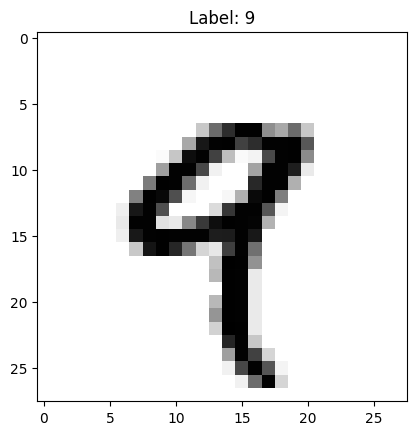

In [ ]:
digit = train_images[4]  # 5th image (index 4!)
plt.imshow(digit, cmap=plt.cm.binary)  # plot image
plt.title(f"Label: {train_labels[4]}");  # label for 5th image

It's interesting to notice that these images are actually NumPy arrays:

In [ ]:
type(digit)

numpy.ndarray

The images have a size of 28 by 28 pixels:

In [ ]:
digit.shape

(28, 28)

They are black and white images, so there is only one channel for the gray scale. RGB images, for instance, have three channels: one for red (R), one for blue (B), and one for green (G). These images would be 3D arrays. The data type of the elements is `uint8`, which stands for unsigned integer of 8 bits:

In [ ]:
digit.dtype

dtype('uint8')

Unsigned means that all elements are positive, and 8 bit implies there are $2^8$ or 256 possible values. As 0 is included, the maximum value is 255:

In [ ]:
digit.min(), digit.max()

(0, 255)

Each pixel is a feature and so we need to "reshape" the images. In other words, we need to put all the pixels of an image one after the other, so that they form one long row. Then we put the different images below each other and so we get a 'table' with in the rows the examples, here the images, and in the columns the features, here the 28 x 28 = 784 pixels.

In addition, we must normalize the pixel values to floats between 0 and 1. We do that simply by dividing the values by 255:

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))  # reshape
train_images = train_images.astype("float32") / 255  # normalize and convert to float
test_images = test_images.reshape((10000, 28 * 28))  # reshape
test_images = test_images.astype("float32") / 255  # normalize and convert to float

### Our own handwritten digit

The proof of the pudding is in the eating, so we saved our own handwritten digit as an image `"digit.png"`. We read the image using the static method `open` of class `Image` from the Pillow library, which we imported as `PIL`. We then get an `Image` object that we can "resize" to 28 by 28 pixels and convert to a black and white image. Since an image is actually an array containing the pixel values, we can convert it to a NumPy array, whose values we can easily convert to float values between 0 and 1:

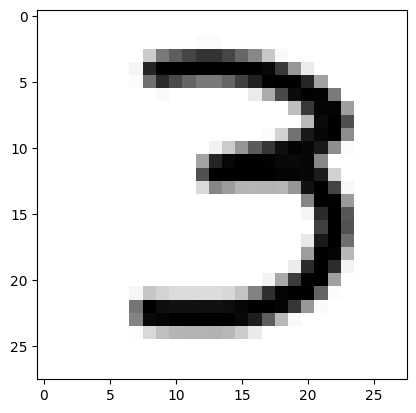

In [ ]:
digit = PIL.Image.open("digit.png")  # read image
digit = digit.resize((28, 28))  # resize image to 28 x 28
digit = digit.convert('L')  # convert image to black and white (L = luminance)
digit = np.array(digit)  # convert image to numpy array
digit = 255 - digit  # turn black into whihte and white in to black
digit = digit.astype("float32") / 255.0  # normalize array
plt.imshow(digit, cmap=plt.cm.binary);  # plot digit

That looks fine! Wondering if our neural networks will recognize the digit....

### Dense neural network

We will now first build a network consisting of 'classical' `Dense` layers. We instantiate a so-called `Sequential` model that consists of a sequence of layers. We will define 3 layers:

- The *input layer* that accepts the converted images. The input size is thus `(None, 784)`, where the `None` refers to the number of images processed during one iteration of the algorithm. That number is called the *batch size*.
- A *hidden layer* that consists of 512 neurons and applies `"relu"` (rectified linear unit) as the activation function.
- The *output layer* that consists of 10 neurons because we have 10 classes. There are 10 classes because there are 10 digits: from 0 to 9. So each neuron in the output layer corresponds to a digit. The `"softmax"` activation function lets each neuron in the output layer return a probability as output. The neuron with the highest probability indicates the digit that the model predicts.

It's important to realize that we are dealing here with **multi-class classification** instead of binary classification as we have more than 2 classes. So the softmax function could be seen as the generalized form of the sigmoid function for multi-class classification.

In [ ]:
model = keras.Sequential([
 keras.layers.Dense(512, activation="relu"),  # hidden layer consisting of 512 neurons and relu as activation
 keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28 * 28))  # number of neurons for the input layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We see that the model consists of 407,050 parameters! Compare this to single linear regression where the algorithm had to derive only 2 parameters....

Before we can begin training the model, we must first compile it. We need to specify what loss function the algorithm should use, and what optimizer it must apply to minimize that loss function. Explaining what exactly `"sparse_categorical_crossentropy"` means is out of scope, but keep in mind it is used as a loss function for multi-class classification models in which labels are represented as integers, like here.

We will also specify that we want the accuracy to be calculated after each epoch. Of course, we already know the `"accuracy"` metric: it is the number of correctly classified images divided by the total number of images.

And we also know what an *epoch* is. Indeed, the algorithm will repeatedly go through the entire dataset to optimize the parameters. When the algorithm has fully processed the dataset one time, it has completed one epoch.

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function that calculates difference between predicted and true labels
    optimizer="rmsprop",  # algorithm that minimizes the loss function
    metrics=["accuracy"]  # calculate accuracy after each iteration (epoch)
  )

Voila, we are ready to train the model. Just like with Scikit-Learn, with Keras we also call the method `fit`, and we pass the features and labels to it: `train_images` and `train_labels`. So we use only the training set! We also need to specify the number of epochs and the batch size. In this case, 5 epochs will suffice and we let the algorithm process 128 images at once.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);  # training the model using the training set

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2657 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1059 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0695 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0511 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9889


The model achieves a very high accuracy of almost 99%! But does it perform as well on the test set?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  # evaluate model using the test set
print(f"accuracy on the test set: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0682 - accuracy: 0.9784
accuracy on the test set: 0.9783999919891357


The accuracy on the test is also very high! So that looks good!

Should the accuracy of the test set be much lower, our model would suffer from **overfitting**. As we already know, we basically need to use a third set to detect overfitting: the validation set. In that case, the loss (and accuracy) is calculated during training for both the validation set and the training set after each epoch. From the moment the loss of the training set keeps decreasing, while that of the validation set does not or even starts to increase, we need to stop. For this example, we figured out in advance that we should stop after about 5 epochs, and therefore, we did not validate the model.

Since overfitting is a fundamental problem in machine learning and deep learning, several regularization techniques are available to avoid it! However, explaining these techniques is not within the scope of this workshop.

Let us now test whether the neural network effectively recognizes our own handwritten digit. Just like with Scikit-Learn, we also use method `predict` and pass our image as input. Of course, we also need to reshape this image into a long row of pixels:

In [ ]:
probs = model.predict(digit.reshape(1, -1))  # predict returns 10 probabilities
probs[0]

1/1 [==============================] - 0s 58ms/step


array([2.9876305e-06, 4.3787732e-06, 3.9882454e-04, 9.9959117e-01,
       1.3545465e-10, 8.9304763e-07, 1.9179638e-10, 1.5312692e-08,
       1.5813225e-06, 1.8432421e-07], dtype=float32)

We get 10 probabilities as output indeed. So that's 10 numbers between 0 and 1 that we have to interpret as percentages. We see the fourth element is the largest number. Since we start from digit 0, the fourth element corresponds to digit 3, which has the highest probability:

In [ ]:
prob = np.max(probs) * 100  # largest probability
n = np.argmax(probs)  # index (= digit) corresponding to the largest probability
print(f"The neural network is for {prob:.2f} % sure the digit is {n}!")

The neural network is for 99.96 % sure the digit is 3!


### Convolutional neural network

In theory, a convnet or CNN performs even better than a `classical` network with dense layers. Let's check that out using the following model that consists of 3 `Conv2D` layers, each separated by a `MaxPooling2D` layer. The first layers apply the convolutional "filters", the second perform some kind of compression. Discussing in detail how these layers work is out of scope.

Unlike the previous model, we don't have to reshape the input images into a long row of pixels. No, because we are applying these "filters", the images should remain rectangular. Hence, the input shape of the input layer is 28 by 28. The number of color channels is also taken into account, but since we are dealing with black and white images, that number is 1.

The output layer is the same as the one in our previous model: a `Dense` layer with 10 neurons, and the softmax function that will give probabilities as output. The `Flatten` layer that comes just before the output layer has the sole function of converting the `rectangular` output of the last convolutional layer to 1 long row, which can be passed to the last `Dense` output layer.

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28, 28, 1))  # input consists of images of 28 x 28 pixels en 1 color channel
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)             

Now we compile the model in the same way as the previous model:

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function
    optimizer="rmsprop",  # optimizer
    metrics=["accuracy"]  # accuracy as metric
  )

Before we can start training the model, we must "reshape" the training and test set to shape `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`, respectively:

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

We are ready now to train the model. Again, we take 5 epochs, and this time, set the batch size to 64:

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64);

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.1598 - accuracy: 0.9509
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0465 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0318 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0187 - accuracy: 0.9944


We already achieved a very high accuracy using the previous neural network, but the convnet performs even slightly better!

And what is its accuracy on the test set?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"accuracy on the test set: {test_acc}")

313/313 [==============================] - 4s 11ms/step - loss: 0.0298 - accuracy: 0.9906
accuracy on the test set: 0.9905999898910522


That accuracy is also slightly better!

Finally, we test the new model on our own image with handwritten digit. We may not forget to add an extra dimension. For example, we can do this as follows:

> `digit = digit[np.newaxis, :, :]`

In [ ]:
probs = model.predict(digit[np.newaxis, :, :])  # add extra dimension!
prob = np.max(probs) * 100
n = np.argmax(probs)
print(f"The convnet is for {prob:.2f} % sure that the digit is {n}!")

1/1 [==============================] - 0s 81ms/step
The convnet is for 100.00 % sure that the digit is 3!


Nice! After rounding the probability, it turns out the model is 100% sure our digit is 3!


---



---
## **References**

- Serrano, L.G., 2021. [Grokking Machine Learning](https://www.manning.com/books/grokking-machine-learning). Manning Publication.
- Chollet, F., 2022. [Deep Learning with Python (2nd ed.)](https://www.manning.com/books/deep-learning-with-python-second-edition). Manning Publication.
- [NumPy User Guide](https://numpy.org/doc/stable/user/index.html). Consulted on Februari 18, 2024.
- [Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html). Consulted on Februari 18, 2024.
- Rukshan Pramoditha, 2022. [Overview of a Neural Network's Learning Process](https://medium.com/data-science-365/overview-of-a-neural-networks-learning-process-61690a502fa). Medium.

---